In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="gHANp2vsdcbZgpkd2rcs")
project = rf.workspace("plate-detection-hhwwz").project("flower-detection-in-itera")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Flower-Detection-in-ITERA-4 in yolov8:: 100%|██████████| 798/798 [00:00<00:00, 1725.32it/s]


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 7.1 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/Flower-Detection-in-ITERA-4/data.yaml', epochs=500, imgsz=(640, 640), patience=300)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

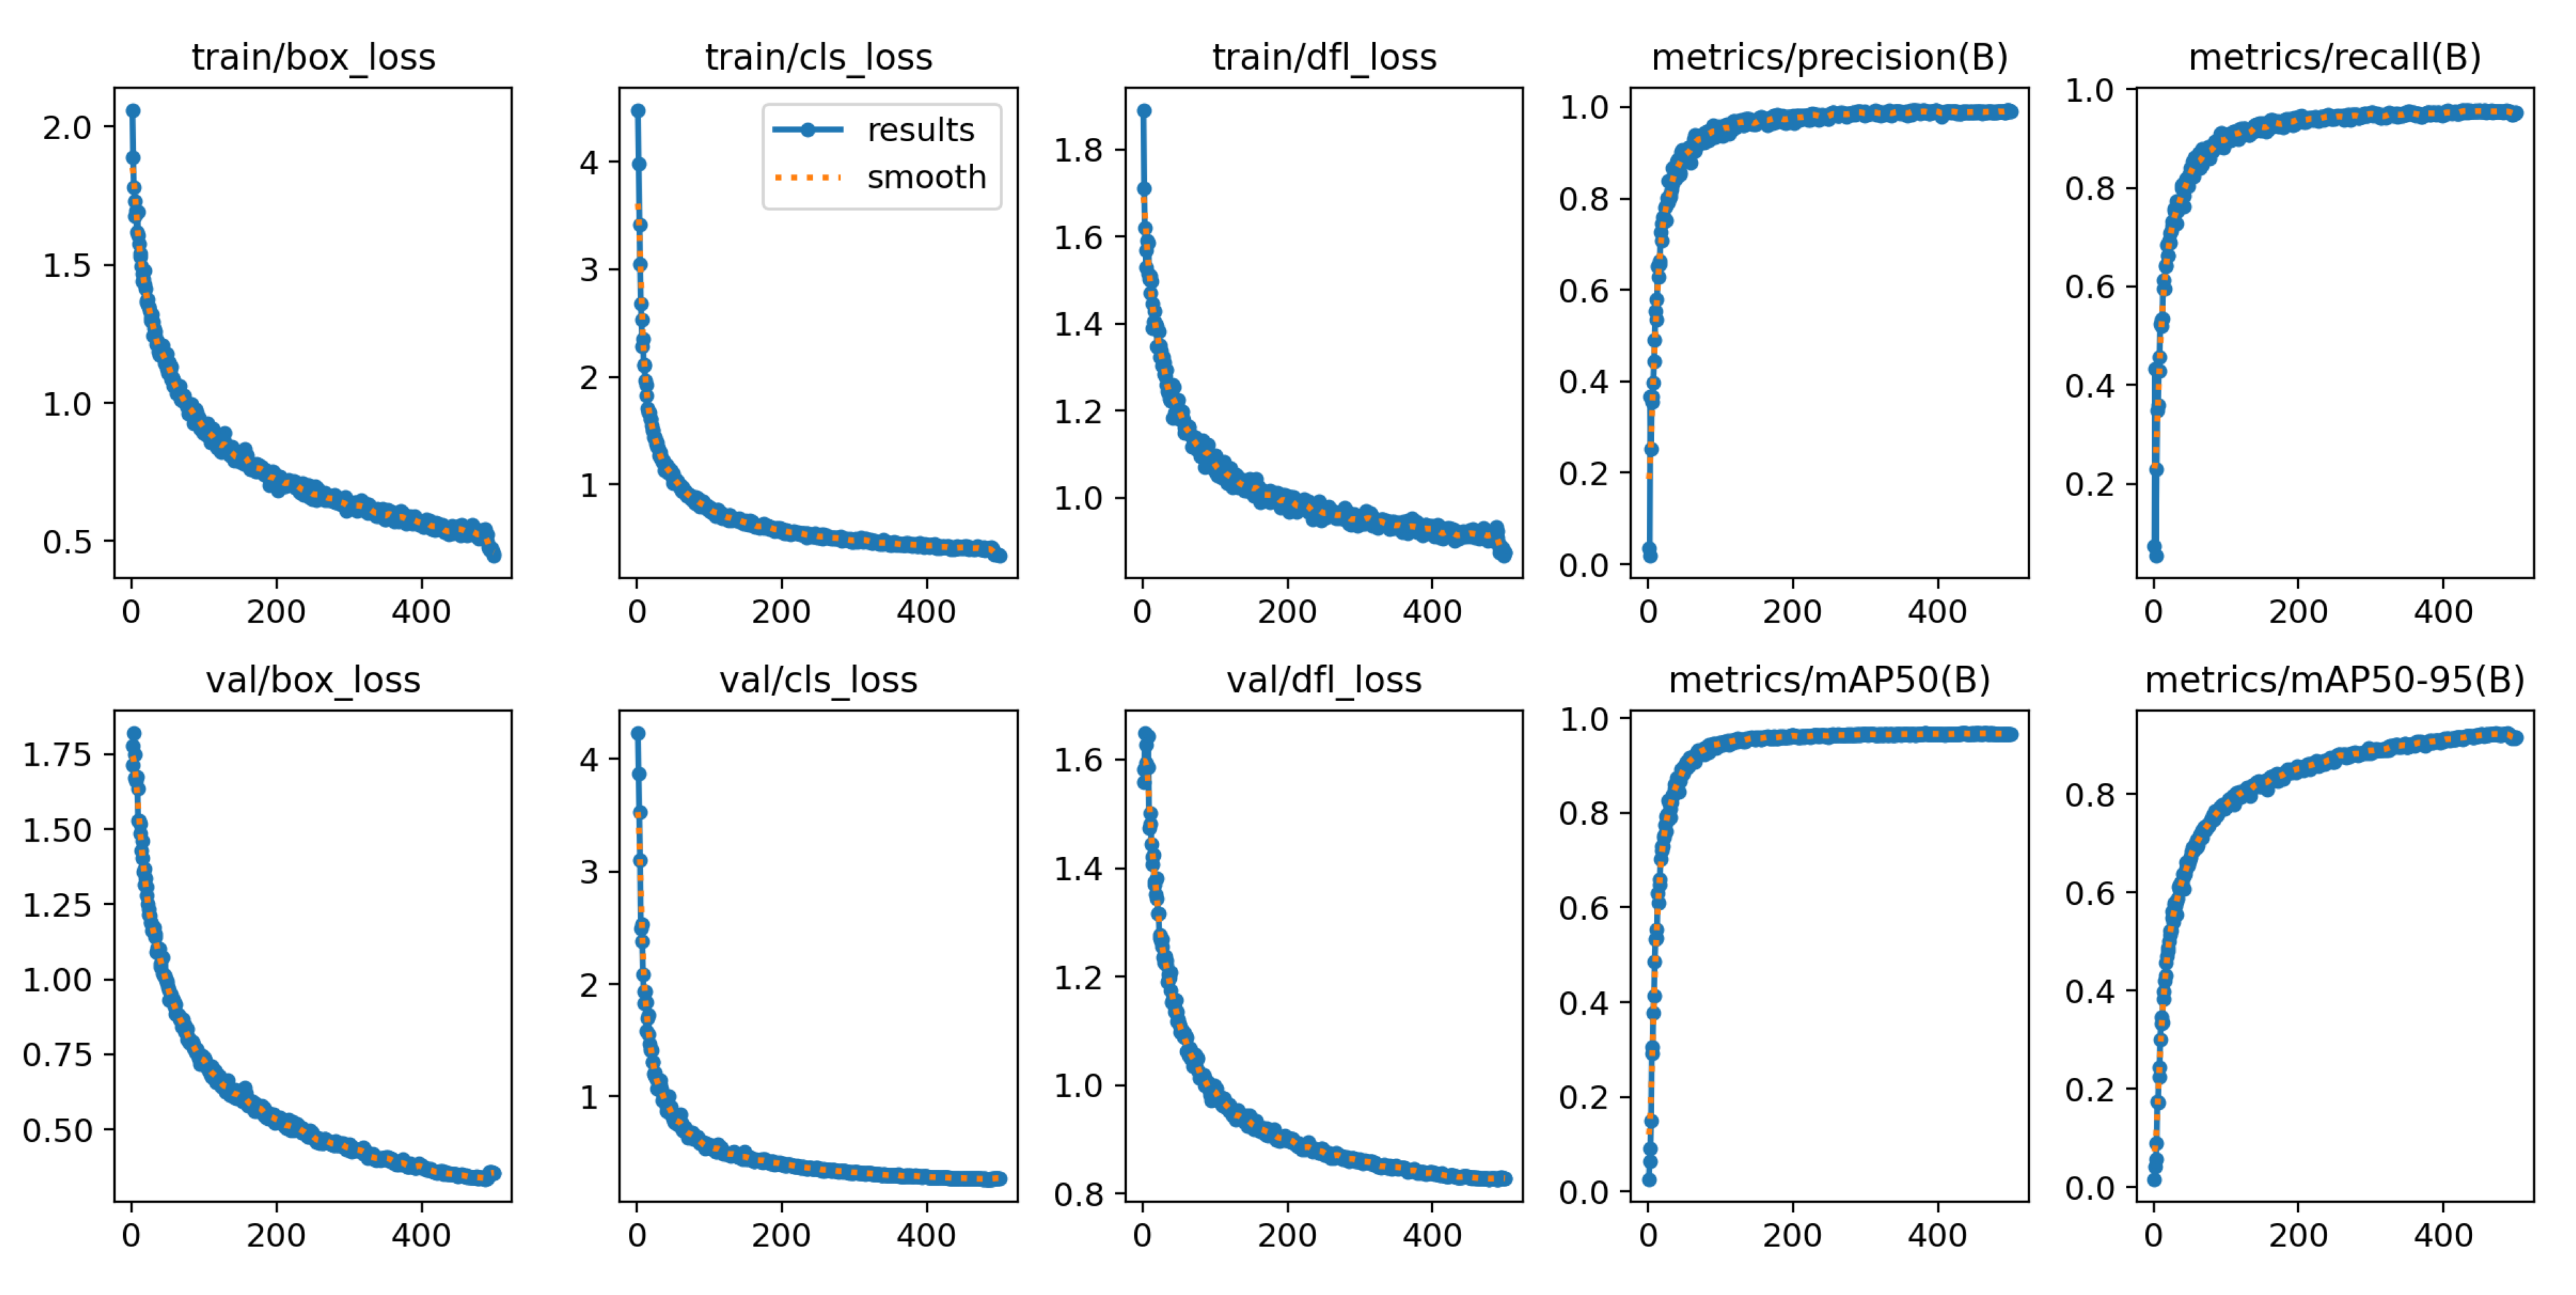

In [24]:
import matplotlib.pyplot as plt
result_plot = plt.imread("/content/runs/detect/train/results.png")
plt.figure(figsize=(50, 25))
plt.imshow(result_plot)
plt.axis('off')
plt.show()

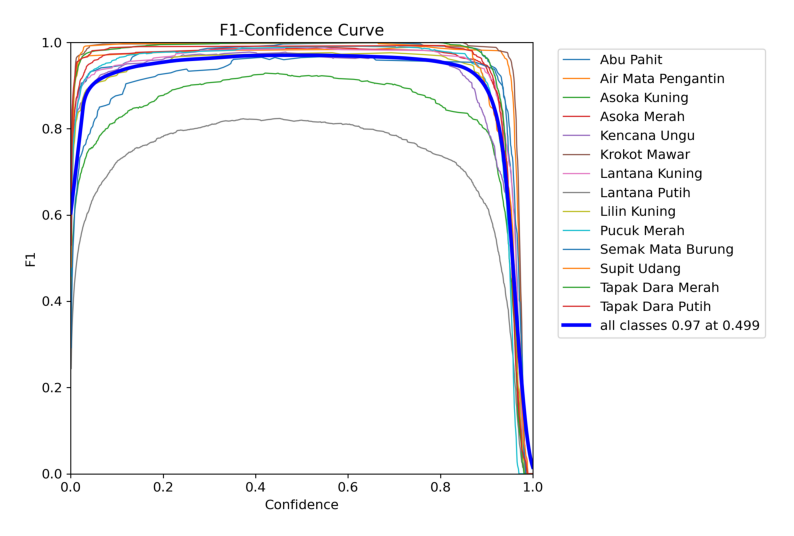

In [7]:
eval_list = ["/content/runs/detect/train/F1_curve.png", "/content/runs/detect/train/PR_curve.png", "/content/runs/detect/train/P_curve.png",
             "/content/runs/detect/train/R_curve.png", "/content/runs/detect/train/confusion_matrix.png",
             "/content/runs/detect/train/confusion_matrix_normalized.png"]

f1_curve = plt.imread(eval_list[0])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(f1_curve)

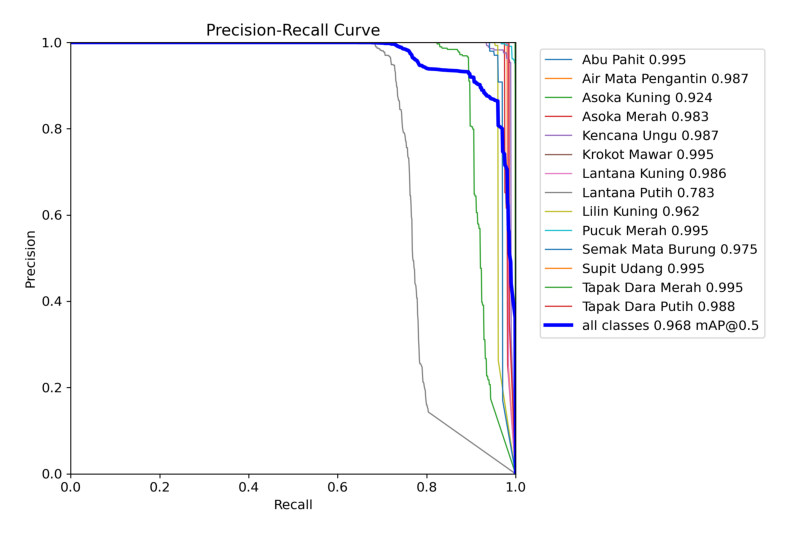

In [8]:
pr_curve = plt.imread(eval_list[1])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(pr_curve)

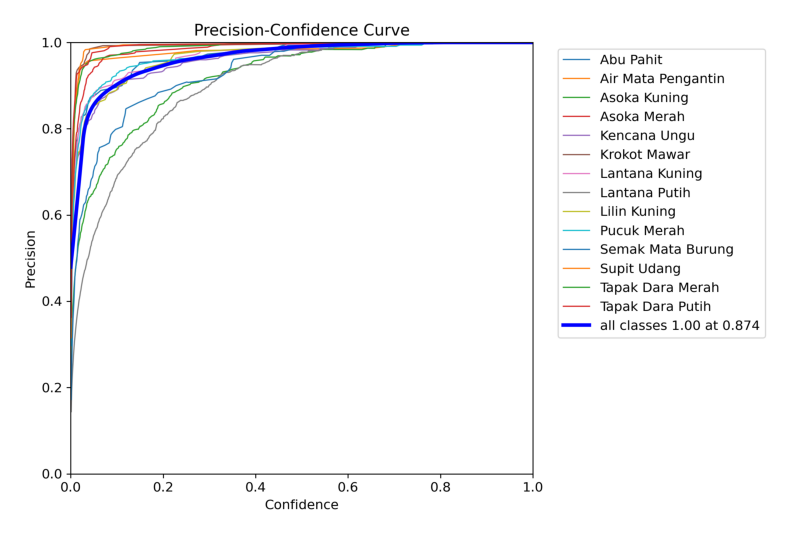

In [9]:
p_curve = plt.imread(eval_list[2])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(p_curve)

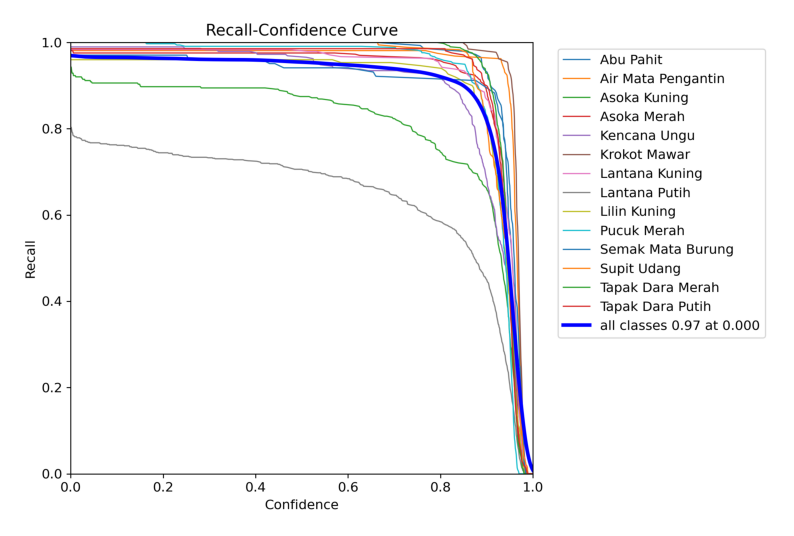

In [10]:
r_curve = plt.imread(eval_list[3])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(r_curve)

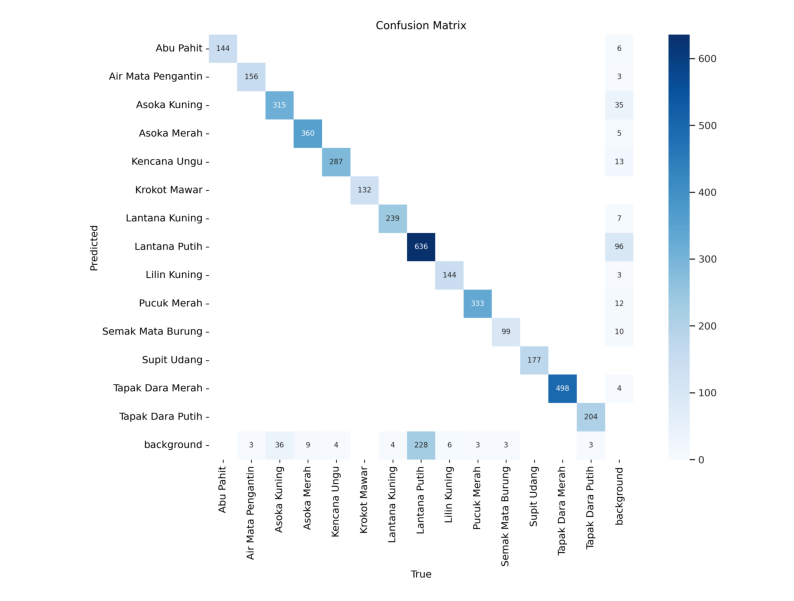

In [11]:
cm = plt.imread(eval_list[4])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm)

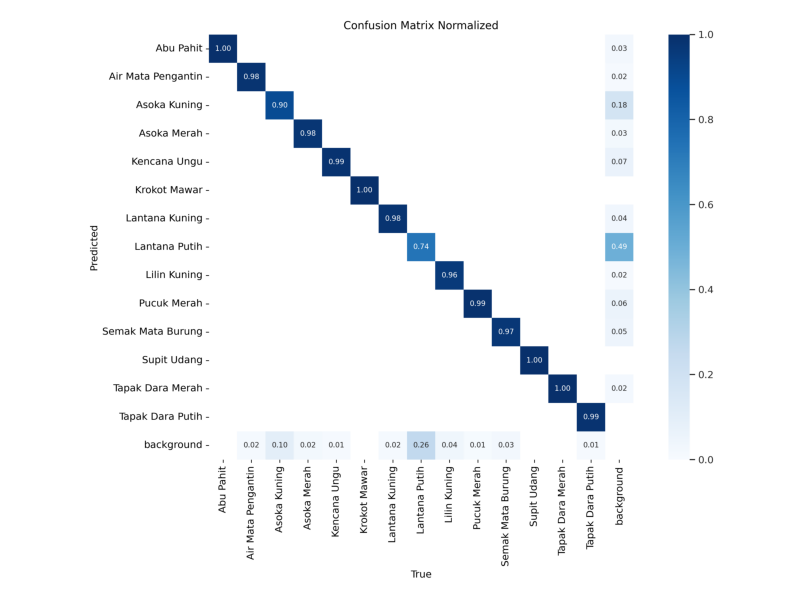

In [12]:
cm_n = plt.imread(eval_list[5])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm_n)

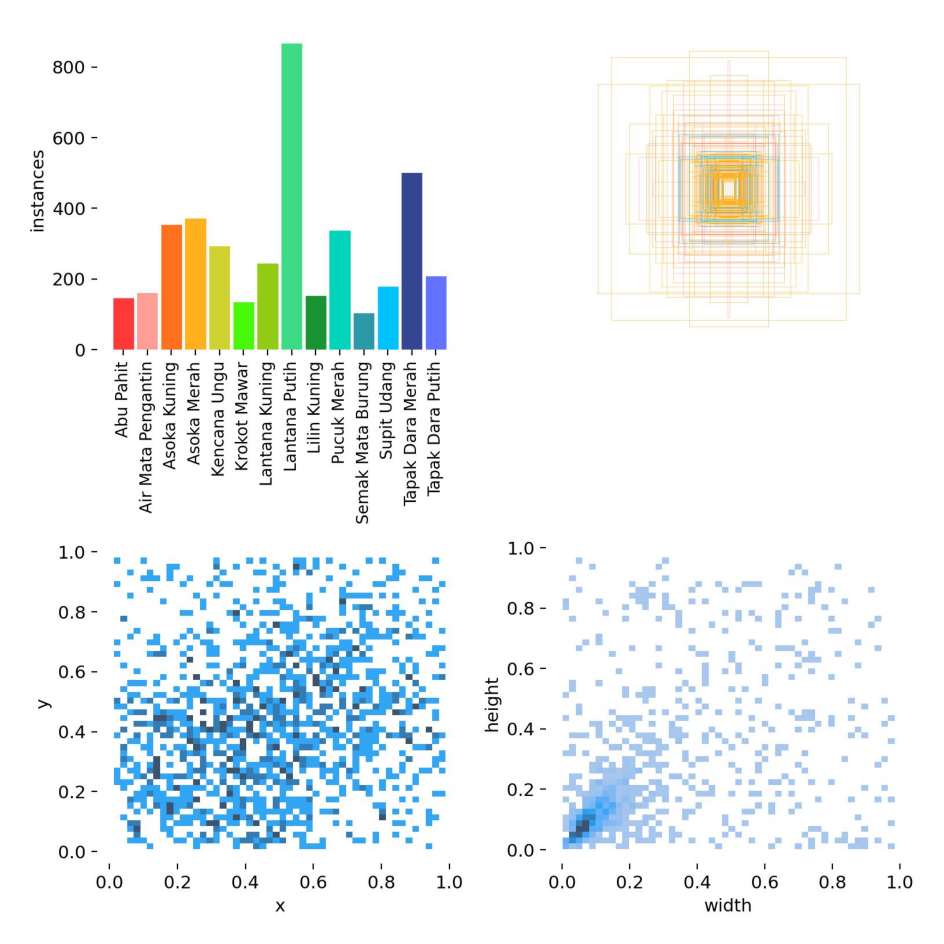

In [30]:
l = plt.imread("/content/runs/detect/train/labels.jpg")
plt.figure(figsize=(12, 12))
plt.imshow(l)
plt.axis('off')
plt.show()

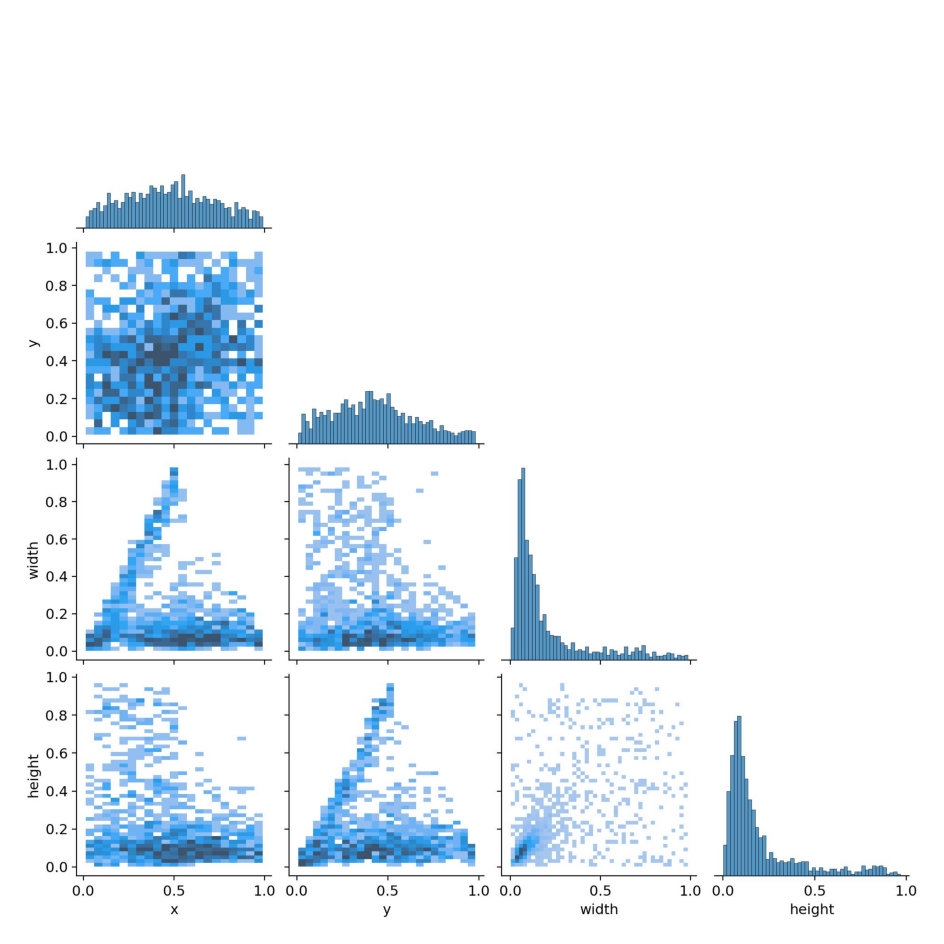

In [29]:
lc = plt.imread("/content/runs/detect/train/labels_correlogram.jpg")
plt.figure(figsize=(12, 12))
plt.imshow(lc)
plt.axis('off')
plt.show()

In [13]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

In [14]:
import cv2
def prediksi(image, model):
  image = cv2.resize(image, (640, 640))
  results = model.predict(image)
  for result in results:
    boxes = result.boxes.cpu().numpy() # get boxes on cpu in numpy
    for box in boxes: # iterate boxes
      r = box.xyxy[0].astype(int) # get corner points as int
      print(r) # print boxes
      cv2.rectangle(image, r[:2], r[2:], (0,200,0), 1) # draw boxes on image
      cls = result.names[int(box.cls[0])]
      cv2.putText(image, str(cls), (r[0] + 4, r[1] - 2), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
  return plt.imshow(image)


0: 640x640 2 Air Mata Pengantins, 57.9ms
Speed: 2.1ms preprocess, 57.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


[306 240 639 412]
[ 66  99 138 209]


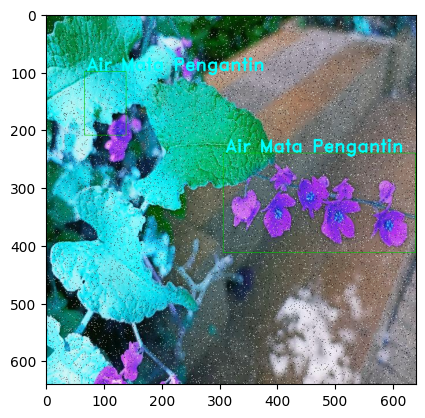

In [17]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923093129_jpg.rf.60d60fe203b9b54614c97bec7b6dcfa8.jpg")
prediksi(image_test, model)


0: 640x640 13 Asoka Kunings, 13.3ms
Speed: 3.4ms preprocess, 13.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


[260 195 358 363]
[454   0 584 154]
[ 32  46 214 276]
[227 394 351 581]
[337 165 387 238]
[569 444 640 582]
[ 66  46 211 335]
[ 56  64 194 216]
[ 28  73 227 137]
[ 36  63 278 146]
[ 23  32 234  79]
[ 22  33 211  59]
[  7   0 262  21]


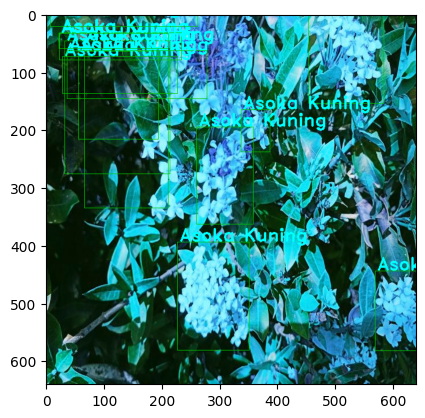

In [32]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923094218_jpg.rf.cb9d7993aad2b536b8733a6264666164.jpg")
prediksi(image_test, model)


0: 640x640 3 Lantana Kunings, 68.5ms
Speed: 2.3ms preprocess, 68.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


[417 276 612 383]
[226 247 343 324]
[235 141 486 259]


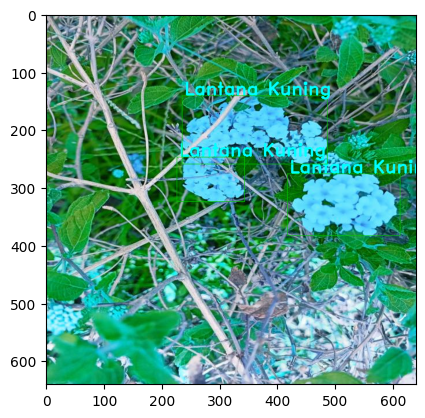

In [33]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923094509_jpg.rf.0cf29e32a2287cf78fd6abbb2b4964ea.jpg")
prediksi(image_test, model)


0: 640x640 3 Krokot Mawars, 17.3ms
Speed: 3.4ms preprocess, 17.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


[353 331 467 494]
[460 327 554 446]
[  0 172  19 288]


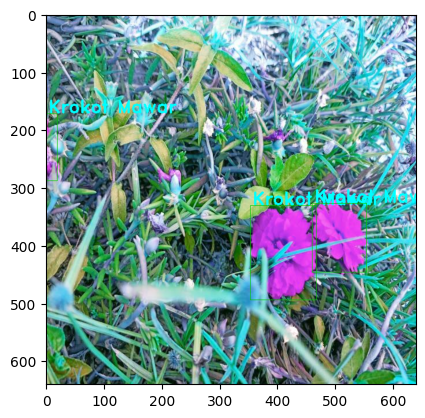

In [34]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923094922_jpg.rf.9e7309ae744a6736434683e333fb2213.jpg")
prediksi(image_test, model)


0: 640x640 11 Lilin Kunings, 17.2ms
Speed: 2.2ms preprocess, 17.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


[215 472 295 568]
[238 329 293 426]
[296  76 371 190]
[166 412 208 454]
[184 567 249 629]
[350 353 399 441]
[408 244 437 281]
[371 273 414 328]
[352 503 399 556]
[293 231 323 278]
[377 202 392 239]


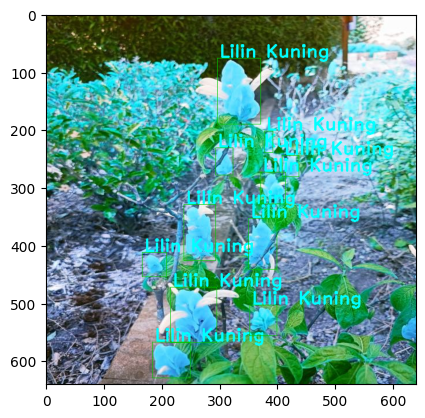

In [35]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923095111_jpg.rf.7a51efd77a9f3030b35514013be1db54.jpg")
prediksi(image_test, model)


0: 640x640 14 Tapak Dara Merahs, 18 Tapak Dara Putihs, 14.4ms
Speed: 4.9ms preprocess, 14.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


[317 448 373 507]
[416 496 473 567]
[198 126 264 215]
[597 273 639 313]
[202 421 274 560]
[560 298 596 325]
[168 286 226 361]
[273 566 354 639]
[ 75 547 157 640]
[557 459 606 524]
[364 226 417 277]
[339 142 385 234]
[478 453 511 501]
[291 285 353 353]
[398 121 444 173]
[472 238 527 295]
[134 377 180 433]
[404 321 502 413]
[575 391 639 462]
[432 423 473 480]
[440 170 484 229]
[386 167 412 203]
[396 569 489 639]
[513 315 560 365]
[260 314 292 383]
[243 244 272 278]
[513 386 554 431]
[535 194 598 280]
[551 354 577 381]
[227 285 254 322]
[612 547 639 595]
[490 599 540 640]


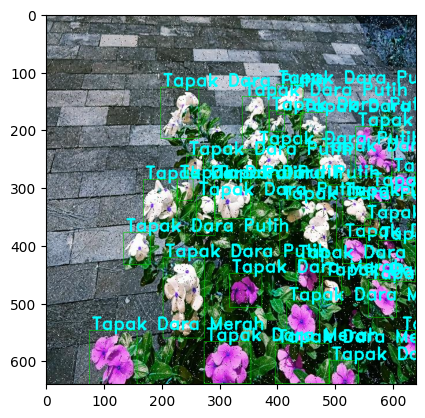

In [36]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923095253_jpg.rf.f195558b76a1ad1632a8689fd168a896.jpg")
prediksi(image_test, model)


0: 640x640 2 Semak Mata Burungs, 32.9ms
Speed: 2.6ms preprocess, 32.9ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)


[331 204 480 335]
[264 268 451 434]


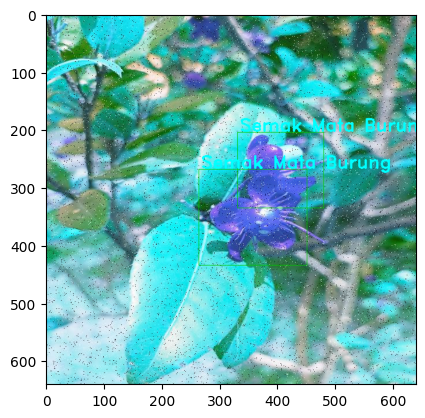

In [37]:
image_test = cv2.imread("/content/Flower-Detection-in-ITERA-4/train/images/IMG20230923101316_jpg.rf.3eb2868c566fc47a750b650cba96e7cc.jpg")
prediksi(image_test, model)